# Data Understanding

Perform the necessary steps to better understand the data.

We omit the step of data collection because I give you all the necessary data.

### Imports

In [ ]:
# Import necessary libraries, functions, objects...

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [ ]:
df = pd.read_csv('data/bank_term_deposit/bank_term_deposit.csv')

## Describe the data

Perform a first, basic, inspection of the data: dimensions, first rows, column types, etc.

In [ ]:
df.shape

(3063, 19)

In [ ]:
df.head()

,id,split,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,labeled,31,management,married,tertiary,no,460,no,no,cellular,28,aug,13,14,-1,0,unknown,no
1,2,labeled,34,blue-collar,married,secondary,no,1826,yes,no,unknown,20,may,203,2,-1,0,unknown,no
2,3,labeled,50,blue-collar,married,secondary,no,290,yes,no,cellular,7,aug,226,3,-1,0,unknown,no
3,4,labeled,42,admin.,divorced,secondary,no,1077,yes,no,unknown,14,may,213,1,-1,0,unknown,no
4,5,labeled,47,services,single,secondary,no,41,yes,no,cellular,5,may,298,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3063 non-null   int64 
 1   split      3063 non-null   object
 2   age        3063 non-null   int64 
 3   job        3063 non-null   object
 4   marital    3063 non-null   object
 5   education  3063 non-null   object
 6   default    3063 non-null   object
 7   balance    3063 non-null   int64 
 8   housing    3063 non-null   object
 9   loan       3063 non-null   object
 10  contact    3063 non-null   object
 11  day        3063 non-null   int64 
 12  month      3063 non-null   object
 13  duration   3063 non-null   int64 
 14  campaign   3063 non-null   int64 
 15  pdays      3063 non-null   int64 
 16  previous   3063 non-null   int64 
 17  poutcome   3063 non-null   object
 18  y          2007 non-null   object
dtypes: int64(8), object(11)
memory usage: 454.8+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3063.0,1843.997388,1029.326516,1.0,950.5,1886.0,2755.5,3521.0
age,3063.0,40.916422,9.921551,19.0,33.0,39.0,48.0,87.0
balance,3063.0,1313.493960,2768.188907,-2076.0,58.0,394.0,1334.5,42042.0
day,3063.0,16.133203,8.245610,1.0,9.0,16.0,22.0,31.0
duration,3063.0,205.055828,204.119886,4.0,89.0,153.0,247.0,2456.0
campaign,3063.0,2.903363,3.183655,1.0,1.0,2.0,3.0,44.0
pdays,3063.0,34.445642,96.050959,-1.0,-1.0,-1.0,-1.0,871.0
previous,3063.0,0.434215,1.475524,0.0,0.0,0.0,0.0,23.0


## Exploratory Data Analysis (EDA)

Summarize main characteristics of the data with visualizations.

### Feature distributions

Check the distributions of numerical features (histogram or boxplot) and categorical features (bar plot).

#### Numerical features

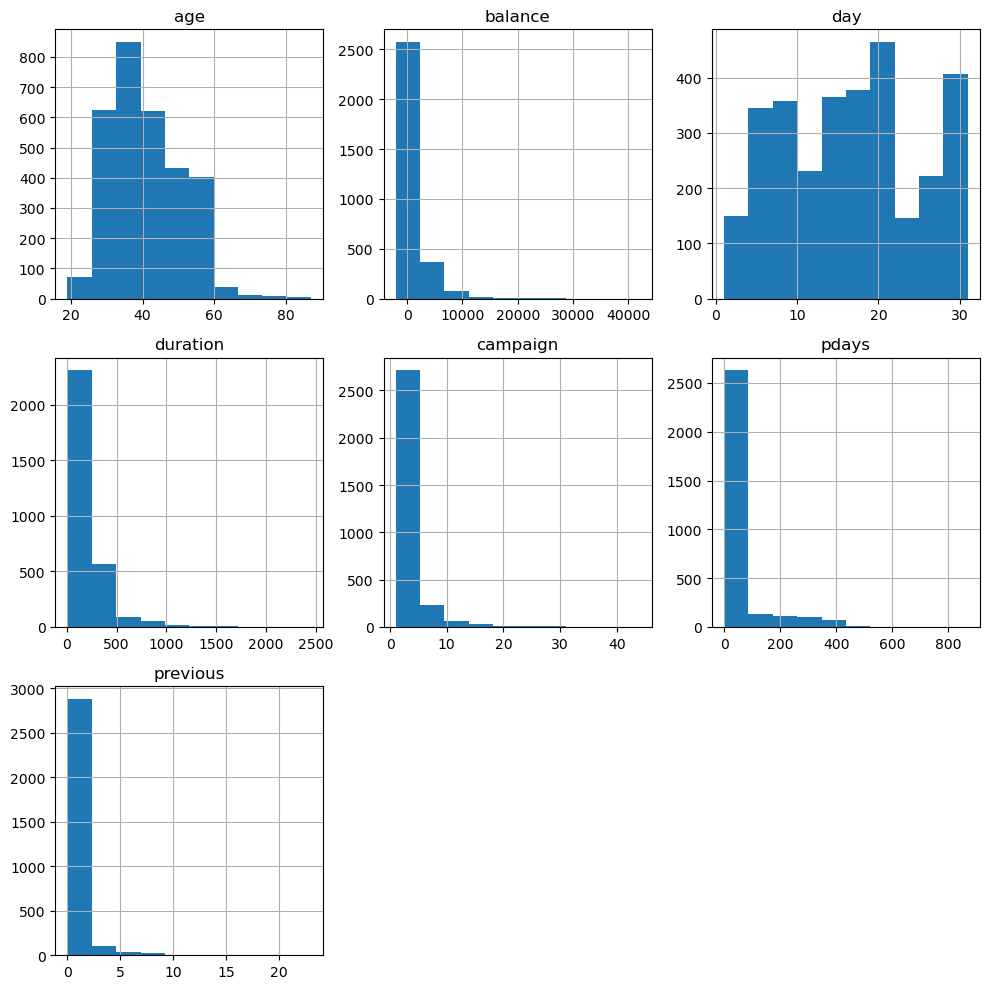

In [ ]:
df.drop(columns='id').hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

#### Categorical features

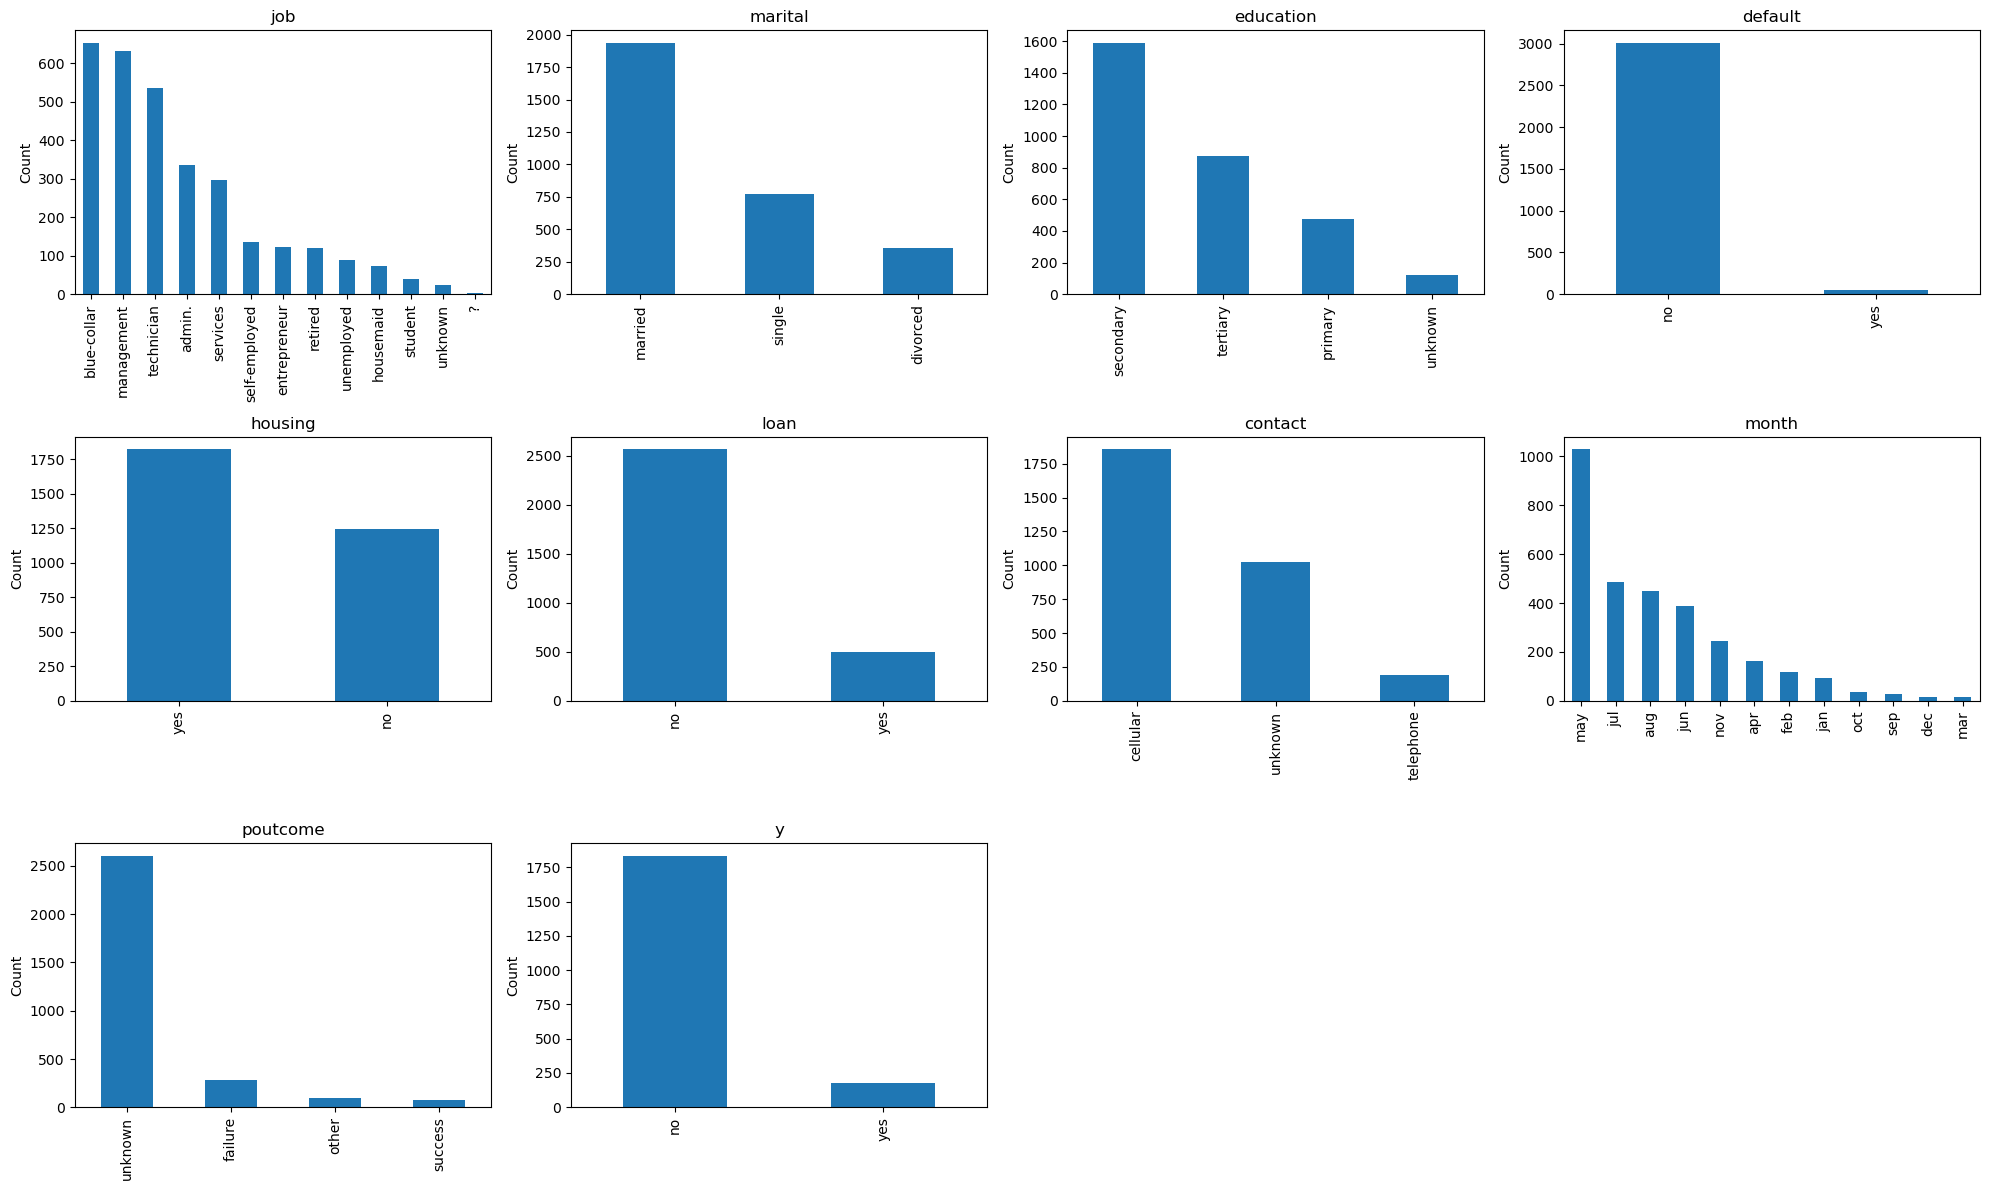

In [ ]:
import math

cats = df.drop(columns='split').select_dtypes(include=['object', 'category'])
n = len(cats.columns)
cols_per_row = 4

rows = math.ceil(n / cols_per_row)
fig, axes = plt.subplots(rows, cols_per_row, figsize=(5*cols_per_row, 4*rows))
axes = axes.flatten()

for i, col in enumerate(cats.columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
to_check = ['default', 'poutcome', 'month']

for col in to_check:
    print(df[col].value_counts(dropna=False))
    print()

default
no     3008
yes      55
Name: count, dtype: int64

poutcome
unknown    2604
failure     286
other        97
success      76
Name: count, dtype: int64

month
may    1029
jul     485
aug     449
jun     386
nov     246
apr     164
feb     118
jan      93
oct      35
sep      29
dec      15
mar      14
Name: count, dtype: int64



### Feature correlation

Display the correlation between pairs of features. This is normally done with the correlation matrix.

Also, display in the same plot or a different one the correlation of features with the target feature.

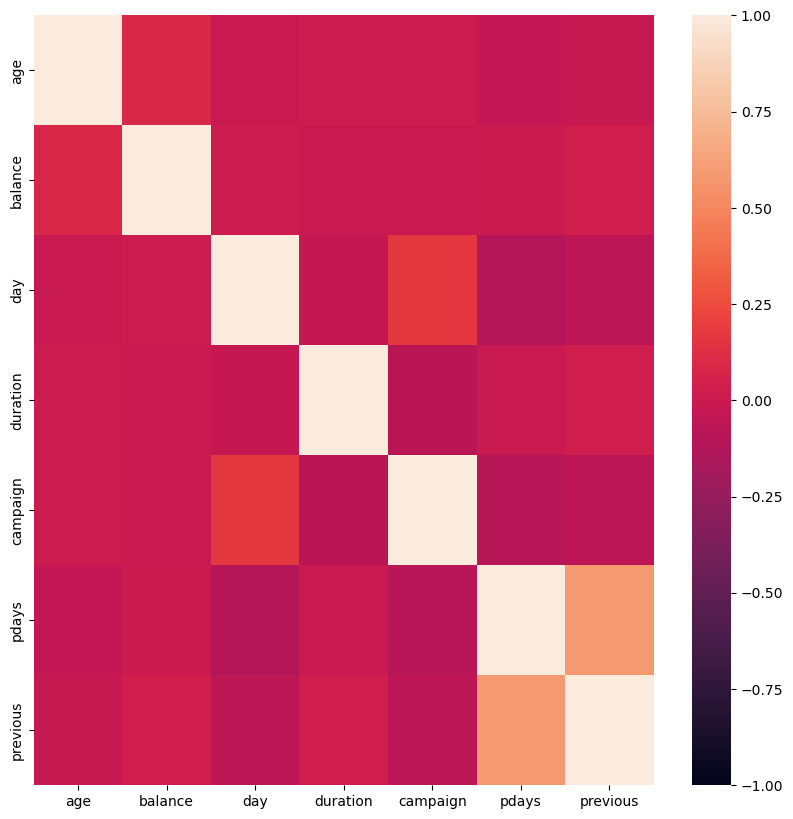

In [ ]:
plt.figure(figsize=(10, 10))
corrs = df.drop(columns=['id', 'split']).corr(numeric_only=True)
sns.heatmap(corrs, vmin=-1, vmax=1)
plt.show()

### Pairplot

Visualize the relationship of different features with a pairplot.

In [ ]:
fts2pair = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

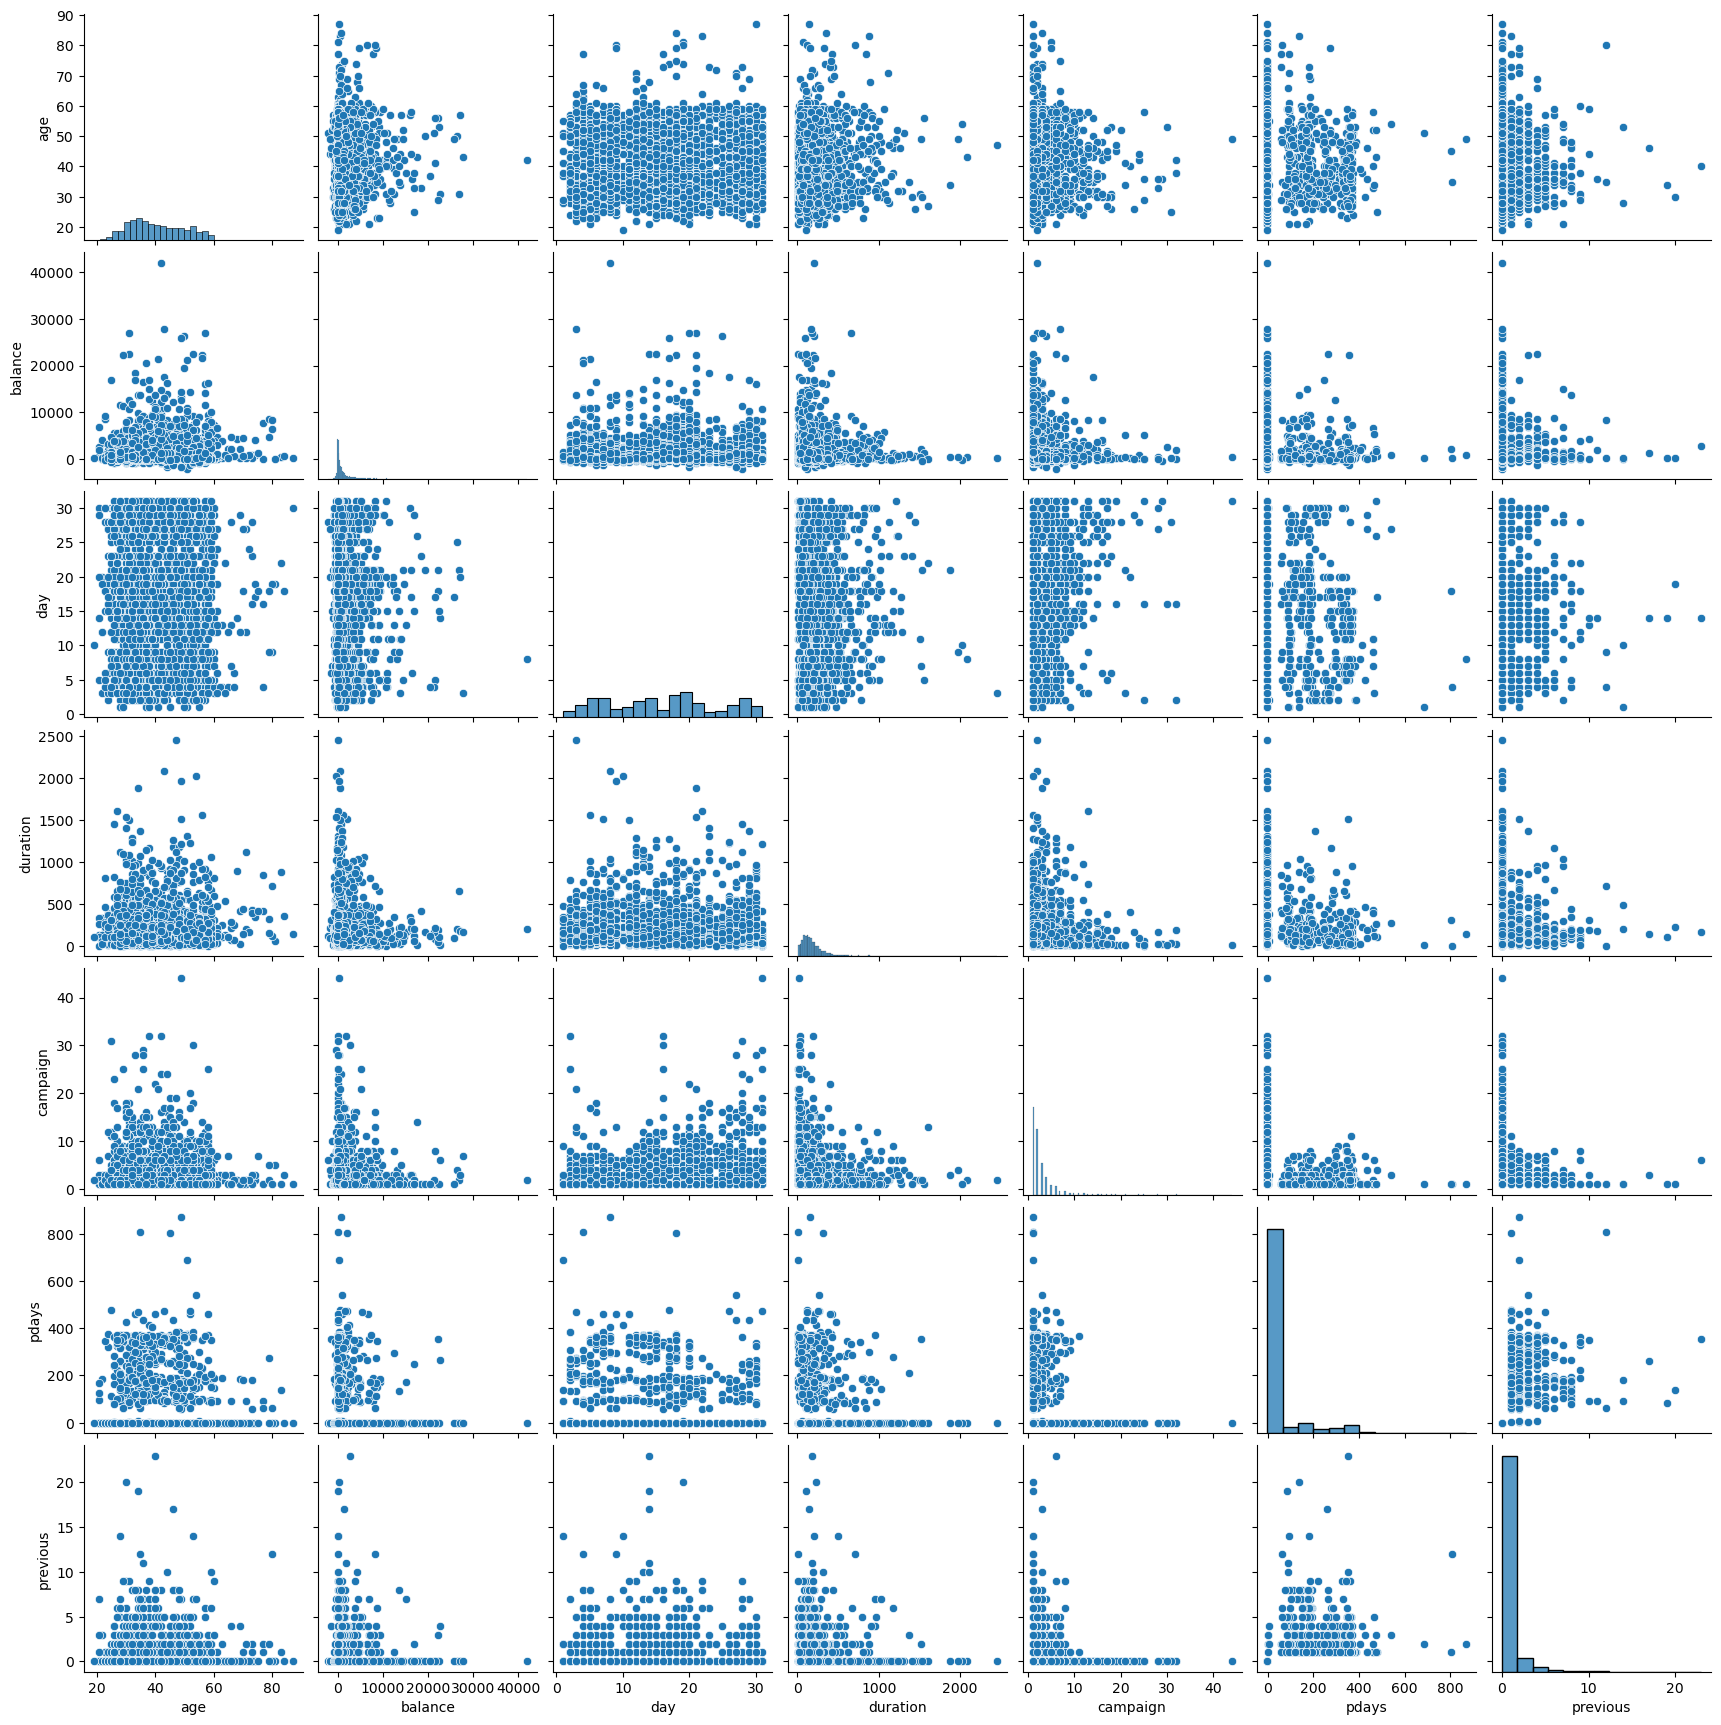

In [ ]:
sns.pairplot(df[fts2pair])
plt.show()

## Verify Data Quality

- Is the data correct? Does any column contain important errors that should be corrected?
- What about missing values?
    - How are they represented (e.g., empty string, NaN, -1, etc.)?
    - Where do they occur?
    - How common are they?
- Do not change the data, just inspect where these problems occur.

### Nulls

In [ ]:
# Null proportion
for col in df.columns:
    is_col_unknown = False
    if df[col].dtype == 'object':
        is_col_unknown = 'unknown' in df[col].str.lower().values
    is_col_minus1 = -1 in df[col].values and col != 'balance'
    if is_col_unknown or is_col_minus1:
        print(col)
        n_nan = df[col].isin(['unknown', '?', -1]).sum()
        print(f'{n_nan / len(df):.1%} unknown values')
        print()

job
0.9% unknown values

education
3.9% unknown values

contact
33.3% unknown values

pdays
85.0% unknown values

poutcome
85.0% unknown values



Check all `pdays` nulls correspond to `poutcome` nulls and vice versa.

In [ ]:
assert list(df['pdays'] == -1) == list(df['poutcome'] == 'unknown')

All `y` nulls are leaderboard as expected. These are OK.

In [ ]:
assert list(df['y'].isna()) == list(df['split'] == 'leaderboard')

### Duplicates

No duplicates.

In [ ]:
df['id'].duplicated().any()

np.False_

In [ ]:
# Are there duplicates after removing these columns?
df.drop(columns=['split', 'id', 'y']).duplicated().any()

np.False_